In [ ]:
!pip install momepy
!pip install numpy
!pip install osmnx
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.9 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import momepy as mm

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [ ]:
blgs = gpd.read_file('/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.1_Output/MilanoSesto_buildings_height.gpkg')

In [ ]:
streets = gpd.read_file('/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.0_Output/street_clean.gpkg')

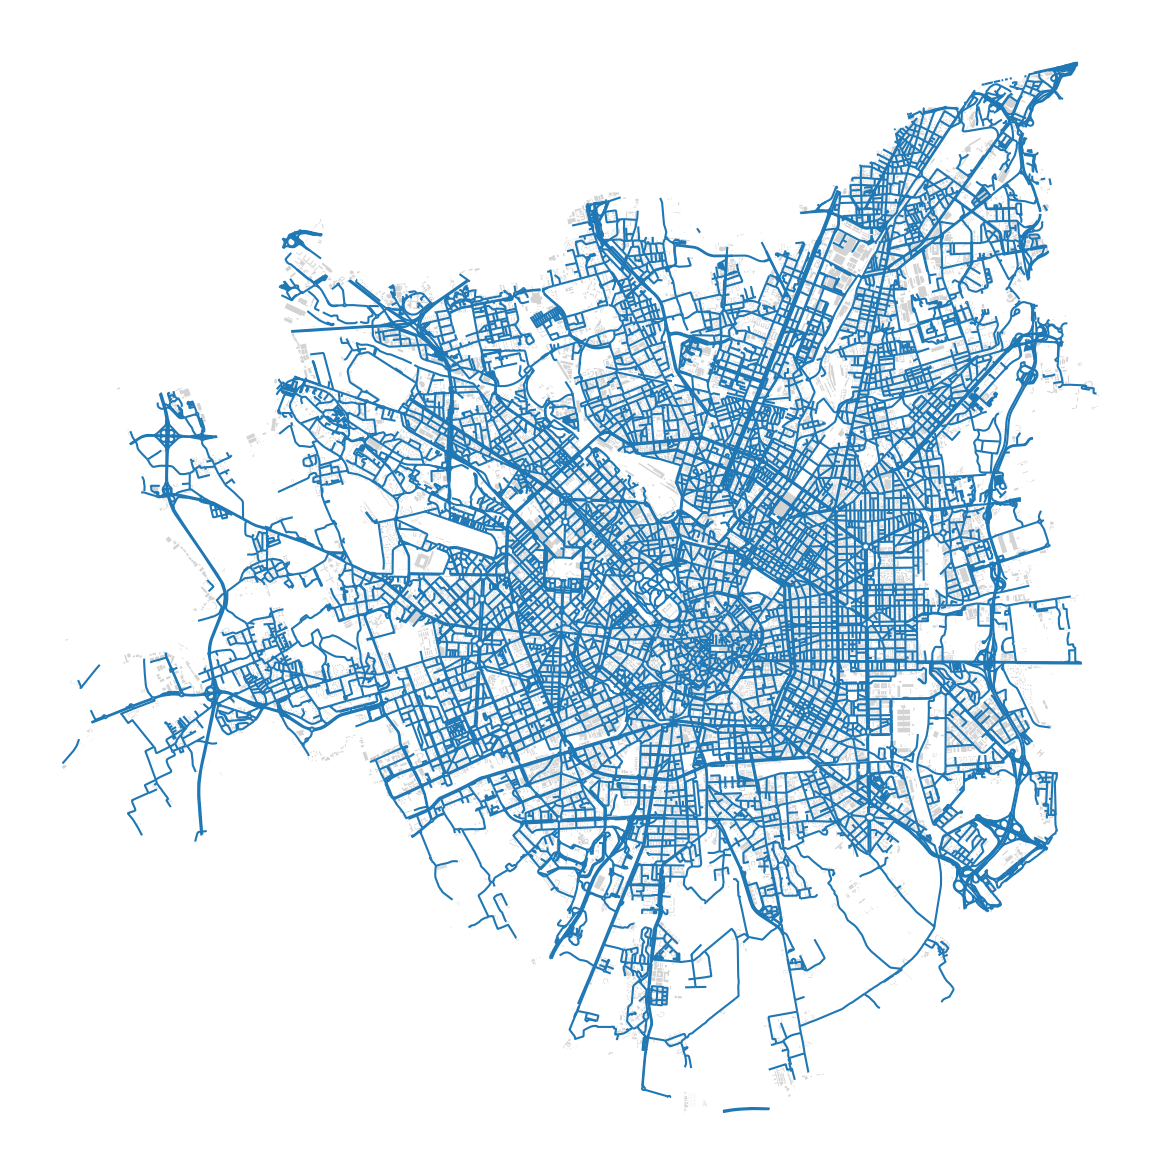

In [ ]:
f, ax = plt.subplots(figsize=(15, 15))
blgs.plot(ax=ax, color='lightgrey')
streets.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [ ]:
blgs.columns

Index(['mean_height', 'SD_height', 'variance_height', 'count', 'volume',
       'geometry', 'uID'],
      dtype='object')

In [ ]:
blgs.drop(['volume'], axis=1, inplace=True)

In [ ]:
blgs.columns

Index(['mean_height', 'SD_height', 'variance_height', 'count', 'geometry',
       'uID'],
      dtype='object')

In [ ]:
streets.columns

Index(['STRATO', 'TEMA', 'CLASSE', 'ID_ZRIL', 'FEATURE_ID', 'EL_STR_TY',
       'EL_STR_CF', 'EL_STR_STA', 'EL_STR_FON', 'EL_STR_CL', 'EL_STR_SED',
       'EL_STR_LIV', 'COD_VIA', 'COD_VIA2', 'COD_ESTESA', 'VERS_CT10',
       'Length', 'uID', 'OBJECTID', 'SEGMENTID', 'CLASSREF', 'EL_STR_NC',
       'DATA_CONS', 'layer', 'path', 'nID', 'geometry'],
      dtype='object')

In [ ]:
nan_counts = streets.isna().sum()
pd.set_option('display.max_rows', None)
print(nan_counts)

STRATO        18516
TEMA          18516
CLASSE        18516
ID_ZRIL       18516
FEATURE_ID    18516
EL_STR_TY     17849
EL_STR_CF     17849
EL_STR_STA    17849
EL_STR_FON    17849
EL_STR_CL     17849
EL_STR_SED    17849
EL_STR_LIV    17849
COD_VIA       18516
COD_VIA2      27993
COD_ESTESA    27953
VERS_CT10     18516
Length        18516
uID           18516
OBJECTID      27326
SEGMENTID     27993
CLASSREF      27326
EL_STR_NC     27975
DATA_CONS     27993
layer         17849
path          17849
nID               0
geometry          0
dtype: int64


In [ ]:
streets

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
limit = mm.buffered_limit(blgs, 100)

In [ ]:
enclosures = mm.enclosures(streets, limit)

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as RDN2008 / UTM zone 32N (N-E) (the single non-null crs provided).
  warnings.warn(


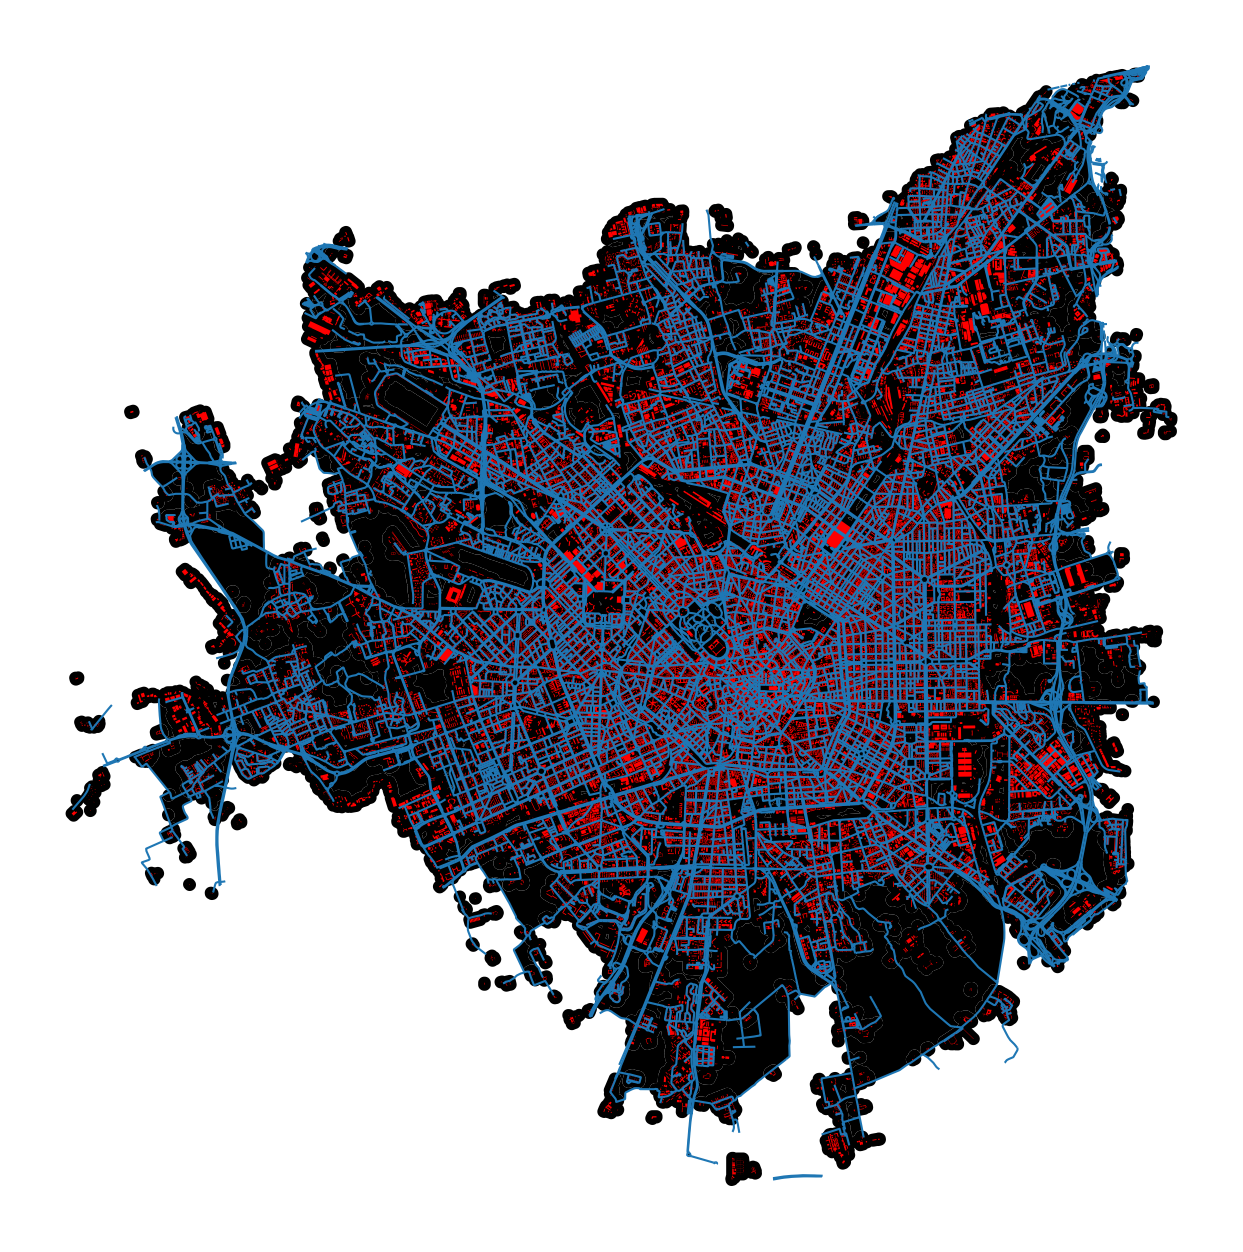

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
enclosures.plot(ax=ax, color='black')
blgs.plot(ax=ax, color='red')
streets.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [ ]:
enclosures.to_file('enclosures0714.gpkg', driver='GPKG')
!cp 'enclosures0714.gpkg' '/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.2_Output'

In [ ]:
encl_tess = mm.Tessellation(blgs, 'uID', enclosures=enclosures).tessellation

/usr/local/lib/python3.10/dist-packages/geopandas/array.py:1486: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as RDN2008 / UTM zone 32N (N-E) (the single non-null crs provided).
  warnings.warn(


In [ ]:
encl_tess.to_file('encl_tess0714.gpkg', driver='GPKG')
!cp 'encl_tess.gpkg0714' '/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.2_Output'

cp: cannot stat 'encl_tess.gpkg0714': No such file or directory


## tessellation based blocks

In [ ]:
blocks = mm.Blocks(encl_tess, streets, blgs, id_name='bID', unique_id='uID')

/usr/local/lib/python3.10/dist-packages/momepy/elements.py:627: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  weights = libpysal.weights.Queen.from_dataframe(cut, silence_warnings=True)


In [ ]:
blocks_gdf = blocks.blocks
blgs['bID'] = blocks.buildings_id
encl_tess['bID'] = blocks.tessellation_id

In [ ]:
blgs.head(5)

,mean_height,SD_height,variance_height,count,geometry,uID,bID
0,13.713333,1.352931,1.830422,3,"POLYGON ((512258.675 5038647.560, 512300.108 5...",1,38.0
1,4.990000,0.000000,0.000000,1,"POLYGON ((512360.577 5038693.209, 512371.960 5...",2,38.0
2,12.196000,0.000000,0.000000,1,"POLYGON ((513301.155 5038209.714, 513312.315 5...",3,601.0
3,23.721286,5.755591,33.126831,7,"POLYGON ((513429.650 5038179.936, 513419.177 5...",4,2580.0
4,6.749000,0.051151,0.002616,5,"POLYGON ((513236.630 5038304.510, 513248.039 5...",5,601.0


## link streets

In [ ]:
blgs['nID'] = mm.get_network_id(blgs, streets, 'nID', min_size=1000) #800

Snapping:   0%|          | 0/56026 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/shapely/measurement.py:72: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)


In [ ]:
blgs.head(5)

,mean_height,SD_height,variance_height,count,geometry,uID,bID,nID
0,13.713333,1.352931,1.830422,3,"POLYGON ((512258.675 5038647.560, 512300.108 5...",1,38.0,449
1,4.990000,0.000000,0.000000,1,"POLYGON ((512360.577 5038693.209, 512371.960 5...",2,38.0,310
2,12.196000,0.000000,0.000000,1,"POLYGON ((513301.155 5038209.714, 513312.315 5...",3,601.0,16713
3,23.721286,5.755591,33.126831,7,"POLYGON ((513429.650 5038179.936, 513419.177 5...",4,2580.0,16856
4,6.749000,0.051151,0.002616,5,"POLYGON ((513236.630 5038304.510, 513248.039 5...",5,601.0,16692


In [ ]:
encl_tess = encl_tess.merge(blgs[['uID', 'nID']], on='uID', how='left')

In [ ]:
blocks_gdf.to_file('blocks0714.gpkg', driver='GPKG')
!cp 'blocks0714.gpkg' '/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.2_Output'

In [ ]:
streets.to_file('streets0714.gpkg', driver='GPKG')
!cp 'streets0714.gpkg' '/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.2_Output'

In [ ]:
blgs.to_file('blgs0714.gpkg', driver='GPKG')
!cp 'blgs0714.gpkg' '/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.2_Output'

In [ ]:
encl_tess.to_file('encl_tess0714.gpkg', driver='GPKG')
!cp 'encl_tess0714.gpkg' '/content/drive/MyDrive/Urban_preception/Milano_Analysis/1.2_Output'

In [ ]:
blocks_gdf.head(5)

,bID,geometry
0,0,"POLYGON Z ((515637.656 5039217.747 129.000, 51..."
1,1,"POLYGON Z ((515551.423 5038985.166 128.191, 51..."
2,2,"POLYGON Z ((515216.305 5039674.892 131.954, 51..."
3,3,"POLYGON Z ((515421.900 5039893.836 132.107, 51..."
4,4,"POLYGON Z ((515265.963 5039943.920 132.911, 51..."


In [ ]:
encl_tess.head(5)

,uID,geometry,eID,bID,nID
0,36494.0,"POLYGON Z ((515489.825 5039165.614 130.078, 51...",7,0.0,5.0
1,36501.0,"POLYGON Z ((515595.712 5039216.798 130.033, 51...",7,0.0,20465.0
2,39155.0,"POLYGON Z ((515475.674 5038950.383 128.553, 51...",8,1.0,20563.0
3,39154.0,"POLYGON Z ((515376.037 5039021.130 129.549, 51...",8,1.0,20302.0
4,39157.0,"POLYGON Z ((515545.381 5039004.518 128.037, 51...",8,1.0,20563.0


In [ ]:
blgs.head(5)

,mean_height,SD_height,variance_height,count,geometry,uID,bID,nID
0,13.713333,1.352931,1.830422,3,"POLYGON ((512258.675 5038647.560, 512300.108 5...",1,38.0,449
1,4.990000,0.000000,0.000000,1,"POLYGON ((512360.577 5038693.209, 512371.960 5...",2,38.0,310
2,12.196000,0.000000,0.000000,1,"POLYGON ((513301.155 5038209.714, 513312.315 5...",3,601.0,16713
3,23.721286,5.755591,33.126831,7,"POLYGON ((513429.650 5038179.936, 513419.177 5...",4,2580.0,16856
4,6.749000,0.051151,0.002616,5,"POLYGON ((513236.630 5038304.510, 513248.039 5...",5,601.0,16692
